In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Linux
# !pip install underthesea --python=python3.11
!pip install underthesea
!pip install transformers

In [ ]:
from underthesea import word_tokenize

import numpy as np
import pandas as pd

import torch
from transformers import AutoModel, AutoTokenizer

import matplotlib.pyplot as plt
import re

# **Sampling**

In [ ]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head()

,URL,Title,Abstract,Content,Category
0,https://thanhnien.vn/tha-tran-dat-50-kg-cung-n...,Thả trăn đất 50 kg cùng nhiều động vật hoang d...,Một con trăn đất nặng khoảng 50 kg cùng nhiều ...,"Ngày 13.9, Chi cục Kiểm lâm TP.HCM cho biết vừ...",Thời sự
1,https://thanhnien.vn/top-10-kem-tri-nam-sau-si...,"Top 10 kem trị nám sau sinh hiệu quả, an toàn ...","Vết nám sạm, tàn nhang sau sinh khiến các mẹ b...",Top 1 kem trị nám sau sinh là sản phẩm đến từ ...,Sức khỏe
2,https://thanhnien.vn/hau-giang-khoi-to-vu-an-n...,Hậu Giang: Khởi tố vụ án nhóm côn đồ dùng dao ...,Công an tỉnh Hậu Giang vừa khởi tố vụ án 17 ...,"Ngày 14.9, tin từ Phòng CSHS Công an tỉnh Hậu ...",Thời sự
3,https://thanhnien.vn/grab-viet-nam-danh-8-ti-d...,Grab Việt Nam dành 8 tỉ đồng hỗ trợ người dân ...,Grab Việt Nam hôm nay thông báo sẽ dành tổng n...,"Theo đó, Grab sẽ dành 2,5 tỉ đồng đóng góp trự...",Công nghệ
4,https://thanhnien.vn/nha-thiet-ke-pham-ngoc-an...,Nhà thiết kế Phạm Ngọc Anh: Chọn đúng 'người y...,"'Nhu cầu về thời trang đang thay đổi, xu hướng...",Xu hướng tiêu dùng thời trang xanh ngày càng n...,NaN


In [ ]:
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

def sample_category(group, n=20000):
    return group.head(n)

sampled_df = shuffled_df.groupby('Category').apply(sample_category).reset_index(drop=True)

display(sampled_df['Category'].value_counts())

Category
Pháp luật        20000
Công nghệ        20000
Xe               20000
Văn hóa          20000
Thời sự          20000
Thể thao         20000
Thể loại khác    20000
Thế giới         20000
Sức khỏe         20000
Đời sống         20000
Kinh tế          20000
Kinh doanh       20000
Giới trẻ         20000
Giải trí         20000
Giáo dục         20000
Du lịch          19659
Khoa học         10703
Bất động sản     10187
Name: count, dtype: int64

In [ ]:
sampled_df.shape

(340549, 5)

In [ ]:
sampled_df.to_csv('../data/sampled_data.csv', index=False, encoding='utf-8')

In [ ]:
# df = pd.read_csv('../data/sampled_data.csv')
# df.head()

,URL,Title,Abstract,Content,Category
0,https://tuoitre.vn/no-vay-bat-dong-san-len-toi...,"Nợ vay bất động sản lên tới hơn 1,2 triệu tỉ đồng",Bộ Xây dựng cho biết tính đến hết năm 2022 tổn...,"Cụ thể, tính đến hết 31-12-2022, nợ vay ngân h...",Bất động sản
1,https://vnexpress.net/biet-thu-nhu-to-hop-3-ng...,Biệt thự như 'tổ hợp' 3 ngôi nhà nhỏ - Báo VnE...,Đà Nẵng- Công trình gồm 3 khối nhà với 3 hệ má...,"Căn biệt thự có diện tích 216 m2, nằm trên xây...",Bất động sản
2,https://tuoitre.vn/mot-can-ho-ban-hai-lan-bat-...,Một căn hộ bán... hai lần: Bắt giam giám đốc N...,"TT - Ngày 23-4, Cơ quan cảnh sát điều tra Bộ C...",NhưTuổi Trẻthông tin (bài“Một căn hộ bán... ha...,Bất động sản
3,https://tuoitre.vn/uu-dai-hap-dan-tai-su-kien-...,Ưu đãi hấp dẫn tại sự kiện ra mắt The Aston Lu...,Sự kiện giới thiệu những căn hộ đẹp nhất block...,Được phát triển trên quỹ đất rộng hơn 11.000m2...,Bất động sản
4,https://tuoitre.vn/cong-trinh-vi-pham-khung-o-...,Công trình vi phạm 'khủng' ở Bình Chánh: Hàng ...,TTO - 104 hộ dân tái định cư nhận nền tại dự á...,"Tháng 6-2020, Ủy ban Kiểm tra Thành ủy TP.HCM ...",Bất động sản


In [ ]:
def tokenize_text(text):
    return word_tokenize(text, format="text") if isinstance(text, str) else text

cols = ['Title', 'Abstract', 'Content', 'Category']

df[cols] = df[cols].apply(lambda col: col.apply(tokenize_text))

df.sample(5)

,URL,Title,Abstract,Content,Category
28976,https://thanhnien.vn/sieu-dong-ho-185267195.htm,""" Siêu "" đồng_hồ",( TNO ) Chiếc đồng_hồ thông_minh I’m_Color chạ...,I’m Color được vận_hành trên nền_tảng Android ...,Công_nghệ
147412,https://thanhnien.vn/bamboo-airways-co-tong-gi...,Bamboo Airways có tổng_giám_đốc mới,Ông Nguyễn_Minh_Hải vừa được bổ_nhiệm làm Tổng...,"Ngày 21.5 , tại cuộc họp HĐQT , Bamboo_Airways...",Kinh_tế
101495,https://tuoitre.vn/sai-gon-cai-luong-bon-mua-1...,​ Sài_Gòn “ cải_lương ” bốn mùa,"TTCT - Cũng lạ , chẳng hiểu từ bao_giờ chữ “ c...","Những năm cuối đại_học , tuổi của những hoang_...",Giới trẻ
45184,https://dulich.tuoitre.vn/hoa-cai-mua-xuan-426...,Hoa cải_mùa xuân,TTO - Lên vùng_cao Tây_Bắc dịp mùa xuân du_khá...,"Cùng sắc hoa đào , hoa_mận , hoa_ban , hoa tớ_...",Du_lịch
127062,https://tuoitre.vn/nhieu-cho-bo-hoang-498948.htm,Nhiều chợ bỏ_hoang,"TT - Ở Kiên_Giang và Sóc_Trăng có nhiều chợ , ...","Trung_tâm thương_mại Thứ_Mười_Một , huyện An_M...",Kinh_doanh


In [ ]:
# df.to_csv('/content/drive/MyDrive/data/segmented_data.csv', index=False, encoding='utf-8')
df.to_csv('../data/segmented_data.csv', index=False, encoding='utf-8')

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/data/segmented_data.csv')
# df.sample(5)

,URL,Title,Abstract,Content,Category
63193,https://tuoitre.vn/chuan-bi-trien-khai-chuong-...,Chuẩn_bị triển_khai chương_trình học tiếng Anh...,TTO - Lễ ký_kết biên_bản ghi_nhớ về việc hợp_t...,Xem video lễ ký_kết English Discoveries_Online...,Giáo_dục
295659,https://tuoitre.vn/truyen-ngan-chuot-202001051...,Truyện_ngắn : Chuột,"TTO - Mọi người quây quanh chiếc bàn_tròn , nh...","Chị Ngân loạng_choạng ngả người ra sau , mọi n...",Văn_hóa
333759,https://thanhnien.vn/tong-thong-cuop-nha-bang-...,' Tổng_thống ' cướp nhà băng,( TNO ) Một người đàn_ông mang mặt_nạ mô_phỏng...,Kẻ_cướp đeo mặt_nạ_hình Tổng_thống Barack_Obam...,Đời_sống
127611,https://tuoitre.vn/can-dau-tu-phat-trien-duong...,Cần đầu_tư phát_triển đường thủy để kéo giảm c...,TTO - Phí vận_tải hàng hóa đường thủy đang cao...,Phát_biểu tại Hội_nghị nâng cao năng_lực kết_n...,Kinh_doanh
74588,https://tuoitre.vn/le-long-dung-thiet-ke-trang...,Lê_Long_Dũng thiết_kế trang_phục nửa tỉ đồng c...,TTO - Thông_tin này được đơn_vị nắm bản_quyền ...,"Theo đó , đại_diện Việt_Nam tham_gia cuộc thiH...",Giải_trí


In [ ]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

for col in ['Title', 'Abstract', 'Content']:
    df[col] = df[col].astype(str).apply(remove_numbers)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

# Tokenize
tokenized_df = df.copy()
for col in ['Title', 'Abstract', 'Content']:
    tokenized_df[col] = tokenized_df[col].apply(lambda text: tokenizer.tokenize(text))

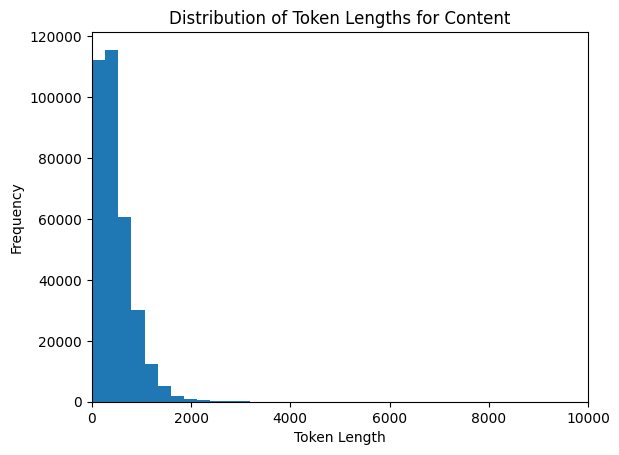

In [ ]:
tokenized_df['Token_num'] = tokenized_df['Content'].apply(len)

plt.hist(tokenized_df['Token_num'], bins=200)
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths for Content')

plt.xlim(0, 10000)

plt.show()

tokenized_df = tokenized_df.drop(columns=['Token_num'])

In [ ]:
tokenized_df.head()

,URL,Category,Title,Abstract,Content
0,https://tuoitre.vn/no-vay-bat-dong-san-len-toi...,Bất_động_sản,"[Nợ, vay, bất_động_sản, lên, tới, hơn, ,, triệ...","[Bộ, Xây_dựng, cho, biết, tính, đến, hết, năm,...","[Cụ_thể, ,, tính, đến, hết, -@@, -, ,, nợ, vay..."
1,https://vnexpress.net/biet-thu-nhu-to-hop-3-ng...,Bất_động_sản,"[Biệt_thự, như, ', tổ_hợp, ', ngôi, nhà, nhỏ, ...","[Đà_Nẵng, -, Công_trình, gồm, khối, nhà, với, ...","[Căn, biệt_thự, có, diện_tích, m, ,, nằm, trên..."
2,https://tuoitre.vn/mot-can-ho-ban-hai-lan-bat-...,Bất_động_sản,"[Một, căn_hộ, bán, ..., hai, lần, :, Bắt, giam...","[TT, -, Ngày, -, ,, Cơ_quan, cảnh_sát, điều_tr...","[Như@@, Tuổi, Tr@@, ẻ@@, thông, tin, (, bài, “..."
3,https://tuoitre.vn/uu-dai-hap-dan-tai-su-kien-...,Bất_động_sản,"[Ưu_đãi, hấp_dẫn, tại, sự_kiện, ra_mắt, The_@@...","[Sự_kiện, giới_thiệu, những, căn_hộ, đẹp, nhất...","[Được, phát_triển, trên, quỹ, đất, rộng, hơn, ..."
4,https://tuoitre.vn/cong-trinh-vi-pham-khung-o-...,Bất_động_sản,"[Công_trình, vi_phạm, ', khủng_@@, ', ở, Bình_...","[TTO, -, hộ, dân, tái, định_cư, nhận, nền, tại...","[Tháng, -, ,, Ủ@@, y_@@, ban, Kiểm_tra, Thành_..."


In [ ]:
tokenized_df.to_csv('/content/drive/MyDrive/data/tokenized_data.csv', index=False, encoding='utf-8')

In [ ]:
tokenized_df.head()

,URL,Category,Title,Abstract,Content
0,https://tuoitre.vn/no-vay-bat-dong-san-len-toi...,Bất_động_sản,"[Nợ, vay, bất_động_sản, lên, tới, hơn, ,, triệ...","[Bộ, Xây_dựng, cho, biết, tính, đến, hết, năm,...","[Cụ_thể, ,, tính, đến, hết, -@@, -, ,, nợ, vay..."
1,https://vnexpress.net/biet-thu-nhu-to-hop-3-ng...,Bất_động_sản,"[Biệt_thự, như, ', tổ_hợp, ', ngôi, nhà, nhỏ, ...","[Đà_Nẵng, -, Công_trình, gồm, khối, nhà, với, ...","[Căn, biệt_thự, có, diện_tích, m, ,, nằm, trên..."
2,https://tuoitre.vn/mot-can-ho-ban-hai-lan-bat-...,Bất_động_sản,"[Một, căn_hộ, bán, ..., hai, lần, :, Bắt, giam...","[TT, -, Ngày, -, ,, Cơ_quan, cảnh_sát, điều_tr...","[Như@@, Tuổi, Tr@@, ẻ@@, thông, tin, (, bài, “..."
3,https://tuoitre.vn/uu-dai-hap-dan-tai-su-kien-...,Bất_động_sản,"[Ưu_đãi, hấp_dẫn, tại, sự_kiện, ra_mắt, The_@@...","[Sự_kiện, giới_thiệu, những, căn_hộ, đẹp, nhất...","[Được, phát_triển, trên, quỹ, đất, rộng, hơn, ..."
4,https://tuoitre.vn/cong-trinh-vi-pham-khung-o-...,Bất_động_sản,"[Công_trình, vi_phạm, ', khủng_@@, ', ở, Bình_...","[TTO, -, hộ, dân, tái, định_cư, nhận, nền, tại...","[Tháng, -, ,, Ủ@@, y_@@, ban, Kiểm_tra, Thành_..."


In [ ]:
tokenized_df.to_csv('/content/drive/MyDrive/data/tokenized_data.csv', index=False, encoding='utf-8')